In [2]:
%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc

import os
import random
import pickle

In [35]:
imageFolder = "images"

# image_dim = 1

fac = 1 ### PARAMETER 1 - REDUCES THE RESOLUTION OF THE AERIAL IMAGE

imgs = {}

for fileName in ["aerial.png", "mask.png"]:
    img = misc.imread("/".join([imageFolder, fileName]))

#     if image_dim == 1 and len(img.shape) > 2: 
    img = img[:,:,:3]
    
    img = misc.imresize(img, (img.shape[0]/fac, img.shape[1]/fac), interp='nearest')
    img = img / 255.0    
    imgs[fileName] = img

print "Load data complete"

Load data complete


image dimensions: (887, 1447, 3)


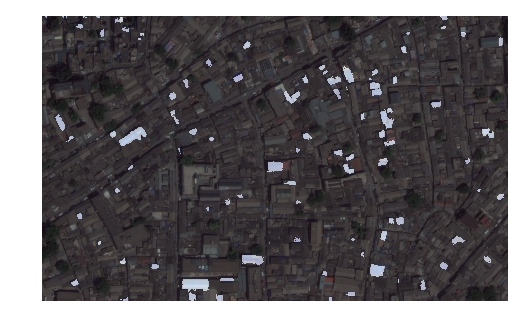

In [36]:
# preview the aerial with the label mask overlayed

import scipy.misc

print "image dimensions:", imgs["aerial.png"].shape

imshow(imgs["aerial.png"], cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')

plt.hold(True)

imshow(imgs["mask.png"], vmin = 0, vmax = 1, alpha=.5, interpolation='nearest')

plt.axis('off')
plt.show()

In [37]:
import math

targetRes = 32  ### PARAMETER 2 - CONTROLS THE SIZE OF THE TRAINING IMAGES
stride = 2      ### PARAMETER 3 - CONTROLS THE NUMBER OF SAMPLES PRODUCED

xStep = int( math.floor( ( float(imgs["aerial.png"].shape[0]) - targetRes ) / stride) )
yStep = int( math.floor( ( float(imgs["aerial.png"].shape[1]) - targetRes ) / stride) )

print xStep, yStep

# dictionary to store image patches into both '0' (not corners) and '1' (corners) categories
dataSet = {}
dataSet[0] = []
dataSet[1] = []

for y in range(yStep):
    for x in range(xStep):

        # crop patch from image
        image_crop = imgs["aerial.png"][x * stride : (x * stride) + targetRes, y * stride : (y * stride) + targetRes]

        # calculate presence of corner from matching crop of label mask
        target_crop = imgs["mask.png"][x * stride : (x * stride) + targetRes, y * stride : (y * stride) + targetRes]
        target = int( round( np.mean( target_crop ) ) )

        dataSet[target].append(image_crop)

# shuffle both data sets
for indx in [0,1]:
    random.shuffle(dataSet[indx])

# for training, we want the same number of image patches from both categories, 
# even though there will be far more patches without corners.
# here we calculate the length of the smaller data set
minSetLen = min(len(dataSet[0]), len(dataSet[1]))
print "smallest set size:", minSetLen

# then we combine an equal number of patches from both categories into one data set
data = []
for indx in [0,1]:
    for d in dataSet[indx][:minSetLen]:
        data.append([d, indx])

# and shuffle the entire data set one more time
random.shuffle(data)
        
print "num samples:", len(data)

427 707
smallest set size: 2863
num samples: 5726


image dimensions: (32, 32, 3)
Value: 1


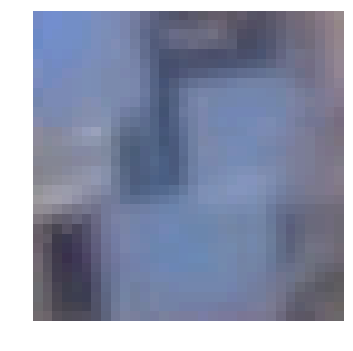

In [39]:
# preview one sample to make sure everything worked as expected

img_index = 0

img = data[img_index][0]
print "image dimensions:", img.shape
print "Value:", (data[img_index][1])

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [40]:
# build X and y datasets for training

X = np.ndarray((len(data), targetRes, targetRes, 3), dtype=np.float32)
y = np.ndarray((len(data), 1), dtype=np.int32)

for i, d in enumerate(data):
    X[i] = d[0]
    y[i] = d[1]

In [41]:
# export data to external file

pickle_file = '-data.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'X': X,
        'y': y,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise
    
statinfo = os.stat(pickle_file)
print 'Saved data to', pickle_file
print 'Compressed pickle size:', statinfo.st_size / 100000 / 10.0, "MB"

Saved data to -data.pickle
Compressed pickle size: 70.3 MB


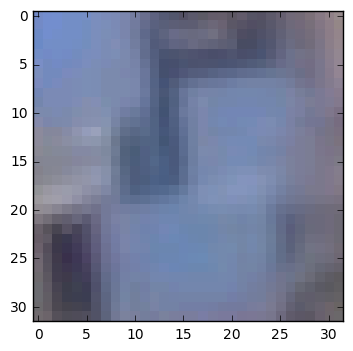

In [43]:
# preview one sample from the final X dataset to make sure nothing happened along the way

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img_num = 0
img = X[img_num]
imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')